In [1]:
using Distributions 
using IntervalSets
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Random123
using HCubature
using HDF5

using KDTree
using BAT
# using BATPar

using LaTeXStrings

In [2]:
import PyPlot

plt = PyPlot

SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.rc("text", usetex=true)

colors = vcat([0 0 0 0], plt.cm.YlOrRd(range(0, stop=1, length=10))[2:end,:]);
# colors = vcat([0 0 0 0.1], plt.cm.Blues(range(0, stop=1, length=10))[3:end,:])

In [3]:
# prior = NamedTupleDist(a = [[1.0 .. 2.0 for i in 1:2]...],);
# outp = bat_read("../../MCMC_publication/Saved_samples/samples_2.hdf5")
# samples = varshape(prior).(outp);

In [4]:
g(x;) = 0.8*pdf.(Normal(-5,0.9), x)+1.2*pdf.(Normal(-1.0,0.4), x) + 0.8*pdf.(Normal(1.0,0.4), x) + 0.8*pdf.(Normal(5,0.9), x) # 2

likelihood = params -> LogDVal((log(g(params.a))))
prior = NamedTupleDist(a = -10. .. 10.);
posterior = PosteriorDensity(likelihood, prior);

samples, stats_tmp = bat_sample(posterior, (1000, 10), MetropolisHastings());

┌ Info: Initializing new RNG of type Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 10 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 10 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 10 chains, 4 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 10 chains, 10 tuned, 10 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC tuning of 10 chains successful after 2 cycle(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:102


In [5]:
KDTree.evaluate_total_cost(data::Data) = KDTree.cost_f_1(data)

In [6]:
smpl = flatview(unshaped.(samples.v))
weights_LogLik = samples.logd
weights_Histogram = samples.weight;

data_kdtree = Data(smpl[:,1:5:end], weights_Histogram[1:5:end], weights_LogLik[1:5:end]);

In [7]:
cost_1 = KDTree.evaluate_total_cost(data_kdtree)
output_1 = KDTree.find_min_along_axis(data_kdtree, 1)

([-7.836640349390915, -7.514517893075652, -7.192395436760389, -6.870272980445126, -6.548150524129863, -6.2260280678146, -5.9039056114993365, -5.581783155184073, -5.25966069886881, -4.937538242553547  …  5.048257903219612, 5.370380359534876, 5.692502815850139, 6.014625272165402, 6.336747728480665, 6.658870184795928, 6.980992641111191, 7.3031150974264545, 7.625237553741718, 7.947360010056981], Any[Inf, Inf, Inf, 2.6279109032273552e8, 2.5543358740504956e8, 2.4031308052611548e8, 2.1900669891702646e8, 1.9472167508709118e8, 1.731881052803065e8, 1.5067275449715877e8  …  1.523161778833658e8, 1.799289824180917e8, 2.0663628041591403e8, 2.299090095162688e8, 2.5030356915200806e8, 2.5929705723459318e8, 2.6465974010523337e8, 2.692432359408169e8, Inf, Inf], -0.10570139782459888, 4.444420079762834e7)

In [8]:
data_kdtree_2 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .> output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .> output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .> output_1[3]]);
data_kdtree_3 = Data(collect(transpose(data_kdtree.samples[data_kdtree.samples[1,:] .< output_1[3]])), data_kdtree.weights[data_kdtree.samples[1,:] .< output_1[3]], data_kdtree.loglik[data_kdtree.samples[1,:] .< output_1[3]]);

In [9]:
cost_2 = KDTree.evaluate_total_cost(data_kdtree_2)
cost_3 = KDTree.evaluate_total_cost(data_kdtree_3)

output_2 = KDTree.find_min_along_axis(data_kdtree_2, 1)
output_3 = KDTree.find_min_along_axis(data_kdtree_3, 1)

([-7.836640349390915, -7.678993917760209, -7.521347486129502, -7.363701054498796, -7.2060546228680895, -7.0484081912373835, -6.8907617596066775, -6.733115327975971, -6.5754688963452645, -6.417822464714558  …  -1.5307830841626602, -1.3731366525319537, -1.2154902209012473, -1.057843789270541, -0.9001973576398346, -0.7425509260091282, -0.5849044943784218, -0.42725806274771544, -0.2696116311170091, -0.11196519948630268], Any[Inf, Inf, Inf, Inf, Inf, 2.3992077168858085e7, 2.3417950120057534e7, 2.28814524652369e7, 2.2131379056312047e7, 2.1272762828518786e7  …  3.1162390799123393e6, 4.275243699534237e6, 6.035156997954768e6, 8.440507123523707e6, 1.184282180002566e7, 1.6399427910694439e7, 1.9609840162198067e7, 2.202319088839033e7, 2.3889287012089957e7, Inf], -2.791954537208311, 1.4935314246786255e6)

In [10]:
data_kdtree_4 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .> output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .> output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .> output_3[3]]);
data_kdtree_5 = Data(collect(transpose(data_kdtree_3.samples[data_kdtree_3.samples[1,:] .< output_3[3]])), data_kdtree_3.weights[data_kdtree_3.samples[1,:] .< output_3[3]], data_kdtree_3.loglik[data_kdtree_3.samples[1,:] .< output_3[3]]);

In [11]:
cost_4 = KDTree.evaluate_total_cost(data_kdtree_4)
cost_5 = KDTree.evaluate_total_cost(data_kdtree_5)

output_4 = KDTree.find_min_along_axis(data_kdtree_4, 1)
output_5 = KDTree.find_min_along_axis(data_kdtree_5, 1)

([-7.836640349390915, -7.733903821576651, -7.6311672937623864, -7.528430765948122, -7.4256942381338575, -7.322957710319593, -7.220221182505329, -7.117484654691064, -7.0147481268768, -6.912011599062535  …  -3.7271792368203367, -3.6244427090060722, -3.521706181191808, -3.4189696533775433, -3.316233125563279, -3.2134965977490144, -3.11076006993475, -3.0080235421204855, -2.905287014306221, -2.8025504864919566], Any[Inf, Inf, Inf, Inf, Inf, Inf, Inf, 1.0366991619707138e6, 967622.4880057697, 939145.0007641338  …  646233.9437577014, 699433.8492150012, 772858.0154150585, 846387.6893939935, 928781.7296490282, 982350.9169734631, 1.0315971228518699e6, 1.0484903307182392e6, Inf, Inf], -5.062754098405775, 181613.13571487952)

In [12]:
cost_array = [cost_1, output_1[4], output_3[4]+cost_2, output_2[4]+cost_5+cost_4]
cut_range = 0:1:3

0:1:3

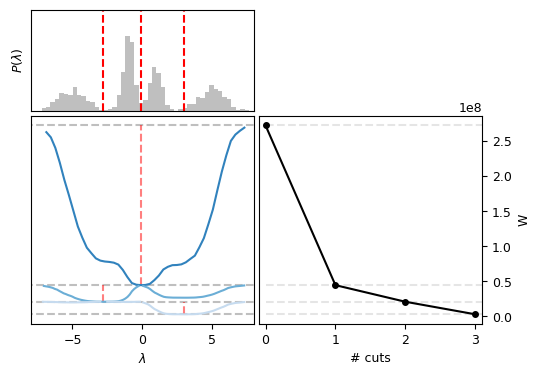

(0.0, 1300.0)

In [13]:
fig = plt.figure(figsize=(5.826767123287671, 4.07873698630137),)

fig.subplots_adjust(hspace=0.05, wspace=0.02)

ax1 = plt.subplot2grid((3, 2), (1, 0), rowspan=2, colspan=1, yticklabels=[],  yticks=[], )
ax2 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], )
# ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="orange",)
ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1,  )

ax2.hist(data_kdtree.samples[1,:], weights=data_kdtree.weights, bins=50, color="gray", alpha=0.5, label="Density");
ax2.vlines(output_1[3], 0, 1700, color="red", ls="--", label="Cut position")
ax2.vlines(output_3[3], 0, 1700, color="red", ls="--")
ax2.vlines(output_2[3], 0, 1700, color="red", ls="--")
ax2.get_xaxis().set_visible(false) 
# ax2.legend(loc="upper left", frameon=true, framealpha=0.9, ncol=1)
ax2.set_ylabel(L"P(\lambda)")

# ax1.plot(output_1[1], output_1[2], color="steelblue") #dodgerblue skyblue lightskyblue lightblue
# ax1.plot(output_2[1], cost_3 .+ output_2[2], color="lightskyblue")
# ax1.plot(output_3[1], cost_2 .+ output_3[2], color="lightskyblue")
# ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color="lightblue")
# ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color="lightblue")
# ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color="lightblue")

ax1.plot(output_1[1], output_1[2], color=PyPlot.ColorMap("tab20c").colors[1]) #dodgerblue skyblue lightskyblue lightblue
ax1.plot(output_2[1], cost_3 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_3[1], cost_2 .+ output_3[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[4])

ax1.hlines(output_3[4]+cost_2, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(output_2[4]+cost_5+cost_4, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(cost_1, -10,10, color="gray", ls="--", alpha=0.5 )
ax1.hlines(output_1[4], -10,10, color="gray", ls="--", alpha=0.5)

ax1.vlines(output_1[3], output_1[4], cost_1, color="red", alpha=0.5, ls="--")
ax1.vlines(output_3[3], output_3[4]+cost_2, output_1[4], color="red", alpha=0.5, ls="--")
ax1.vlines(output_2[3], output_2[4]+cost_5+cost_4, output_3[4]+cost_2, color="red", alpha=0.5, ls="--")
# ax2.vlines(output_3[3], 0, 700, color="red")
# ax2.vlines(output_2[3], 0, 700, color="red")

ax1.set_xlabel(L"\lambda")

ax3.plot(collect(cut_range), cost_array, color="black", "-o", ms=4, mfc="k")
ax3.yaxis.tick_right()
ax3.yaxis.set_ticks_position("right")
ax3.set_xlabel("# cuts")
ax3.set_ylabel("W")
ax3.yaxis.set_label_position("right")

ax3.hlines(output_3[4]+cost_2, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_2[4]+cost_5+cost_4, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(cost_1, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_1[4], 0,4, color="gray", ls="--", alpha=0.2)
ax3.set_xticks(collect(cut_range))
ax3.set_xlim(-0.1, 3.1)

ax2.set_xlim(-8., 8.)
ax1.set_xlim(-8., 8.)

ax2.set_ylim(0.0, 1300.)

# fig.savefig("../plots/fig-b.pdf", bbox_inches = "tight")

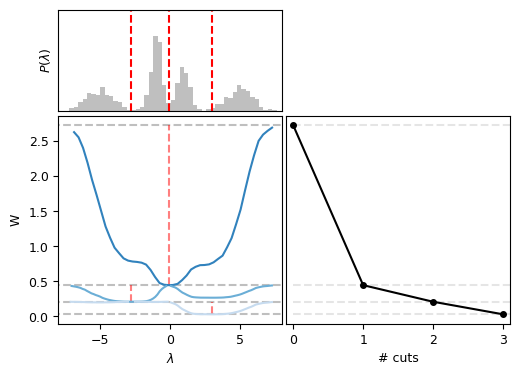

(0.0, 1300.0)

In [20]:
fig = plt.figure(figsize=(5.826767123287671, 4.07873698630137),)

fig.subplots_adjust(hspace=0.05, wspace=0.02)

ax1 = plt.subplot2grid((3, 2), (1, 0), rowspan=2, colspan=1, )
ax2 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], )
# ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="orange",)
ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1,  yticklabels=[], yticks=[],)

ax2.hist(data_kdtree.samples[1,:], weights=data_kdtree.weights, bins=50, color="gray", alpha=0.5, label="Density");
ax2.vlines(output_1[3], 0, 1700, color="red", ls="--", label="Cut position")
ax2.vlines(output_3[3], 0, 1700, color="red", ls="--")
ax2.vlines(output_2[3], 0, 1700, color="red", ls="--")
ax2.get_xaxis().set_visible(false) 
# ax2.legend(loc="upper left", frameon=true, framealpha=0.9, ncol=1)
ax2.set_ylabel(L"P(\lambda)")

# ax1.plot(output_1[1], output_1[2], color="steelblue") #dodgerblue skyblue lightskyblue lightblue
# ax1.plot(output_2[1], cost_3 .+ output_2[2], color="lightskyblue")
# ax1.plot(output_3[1], cost_2 .+ output_3[2], color="lightskyblue")
# ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color="lightblue")
# ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color="lightblue")
# ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color="lightblue")

ax1.plot(output_1[1], output_1[2], color=PyPlot.ColorMap("tab20c").colors[1]) #dodgerblue skyblue lightskyblue lightblue
ax1.plot(output_2[1], cost_3 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_3[1], cost_2 .+ output_3[2], color=PyPlot.ColorMap("tab20c").colors[2])
ax1.plot(output_4[1],  cost_2 + cost_5 .+ output_4[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_5[1], cost_2 + cost_4 .+ output_5[2], color=PyPlot.ColorMap("tab20c").colors[4])
ax1.plot(output_2[1], cost_5+cost_4 .+ output_2[2], color=PyPlot.ColorMap("tab20c").colors[4])

ax1.hlines(output_3[4]+cost_2, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(output_2[4]+cost_5+cost_4, -10,10, color="gray", ls="--", alpha=0.5)
ax1.hlines(cost_1, -10,10, color="gray", ls="--", alpha=0.5 )
ax1.hlines(output_1[4], -10,10, color="gray", ls="--", alpha=0.5)

ax1.vlines(output_1[3], output_1[4], cost_1, color="red", alpha=0.5, ls="--")
ax1.vlines(output_3[3], output_3[4]+cost_2, output_1[4], color="red", alpha=0.5, ls="--")
ax1.vlines(output_2[3], output_2[4]+cost_5+cost_4, output_3[4]+cost_2, color="red", alpha=0.5, ls="--")
# ax2.vlines(output_3[3], 0, 700, color="red")
# ax2.vlines(output_2[3], 0, 700, color="red")

ax1.set_xlabel(L"\lambda")

ax3.plot(collect(cut_range), cost_array, color="black", "-o", ms=4, mfc="k")
ax3.yaxis.tick_right()
ax3.yaxis.set_ticks_position("right")
ax3.set_xlabel("# cuts")
ax1.set_ylabel("W")
# ax3.yaxis.set_label_position("right")

ax3.hlines(output_3[4]+cost_2, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_2[4]+cost_5+cost_4, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(cost_1, 0,4, color="gray", ls="--", alpha=0.2)
ax3.hlines(output_1[4], 0,4, color="gray", ls="--", alpha=0.2)
ax3.set_xticks(collect(cut_range))
ax3.set_xlim(-0.1, 3.1)

ax2.set_xlim(-8., 8.)
ax1.set_xlim(-8., 8.)

ax2.set_ylim(0.0, 1300.)

# fig.savefig("../plots/fig-b.pdf", bbox_inches = "tight")